<a href="https://colab.research.google.com/github/prajwalp111/ML/blob/main/magic_gamma_ml/fcc_MAGIC_SVM_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

#KNN
from sklearn.neighbors import KNeighborsClassifier

#classifiation performance metrics
from sklearn.metrics import classification_report

#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Logistic Regression
from sklearn.linear_model import LogisticRegression

#svm
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix

# Data loading

In [ ]:
cols = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df = pd.read_csv('https://raw.githubusercontent.com/prajwalp111/ML/refs/heads/main/magic_gamma_ml/magic04/magic04.data', names = cols)
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


as class value is gamma-g or hadron-h therefore it should be converted into numbers

In [ ]:
df['class'] = (df['class'] == 'g').astype(int)

In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


### comparing two h n g

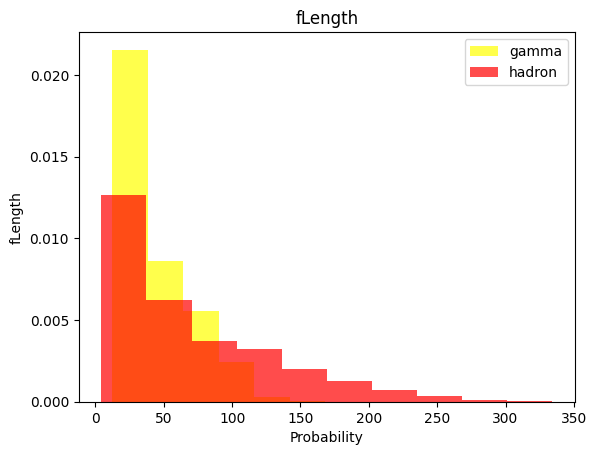

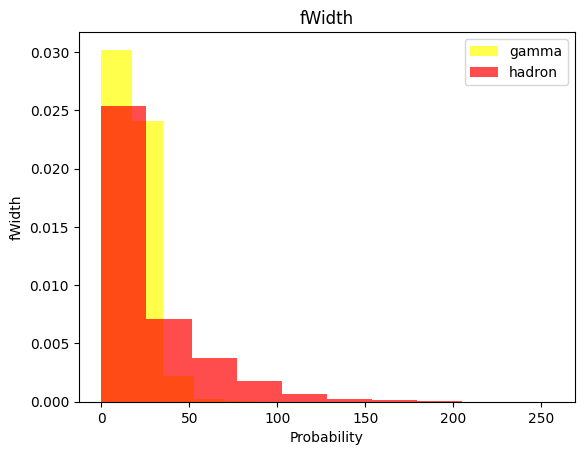

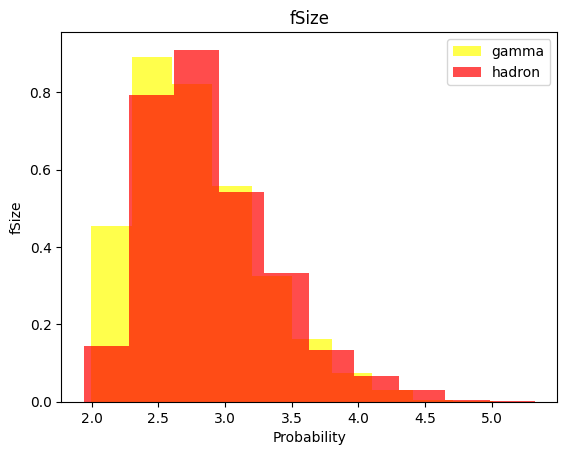

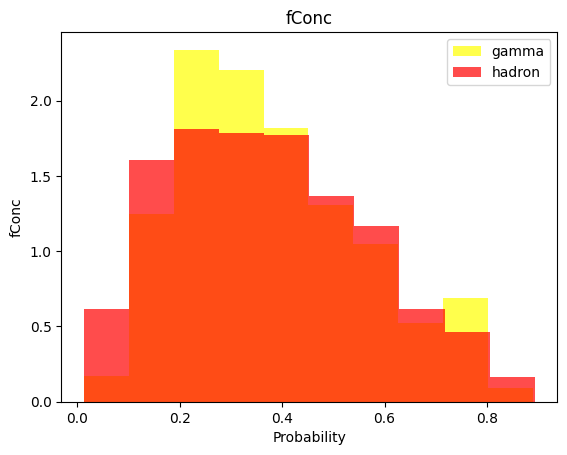

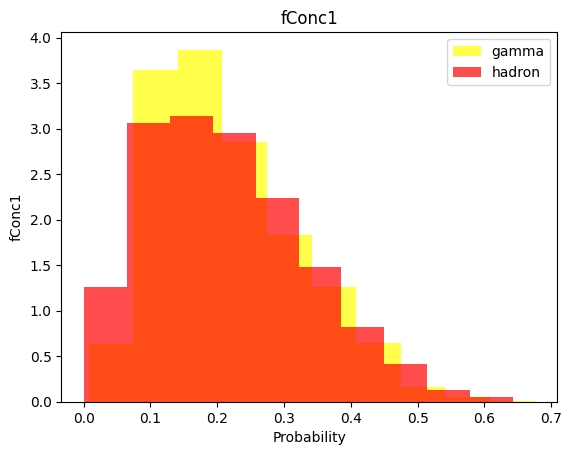

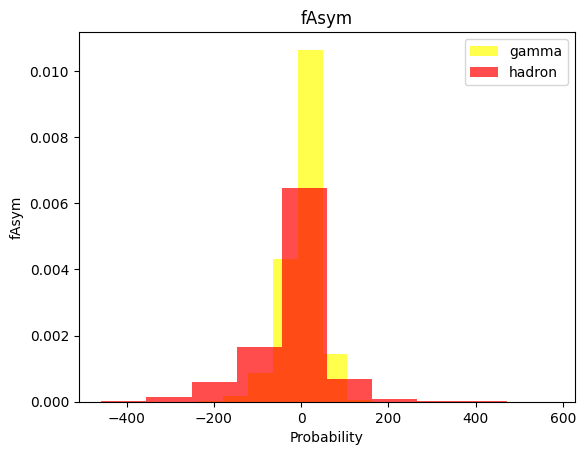

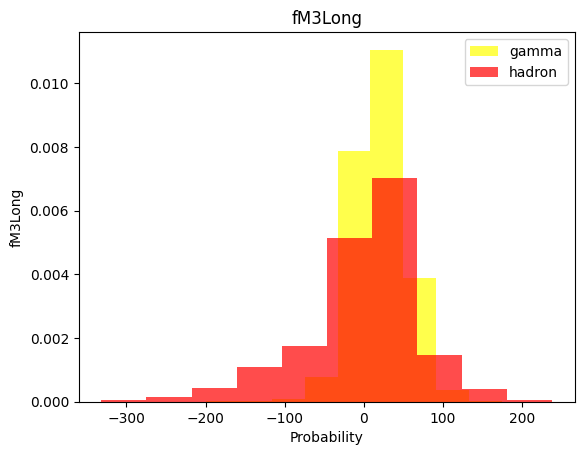

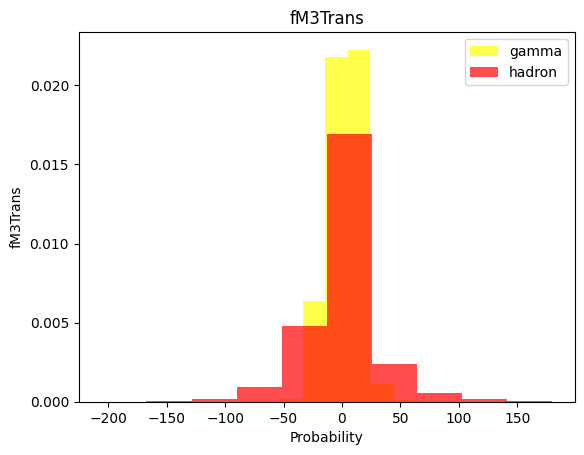

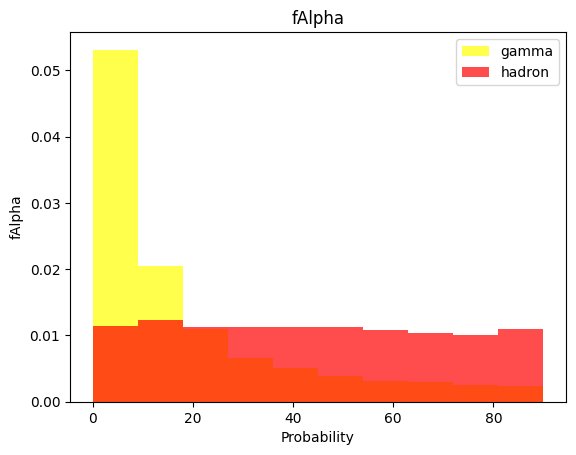

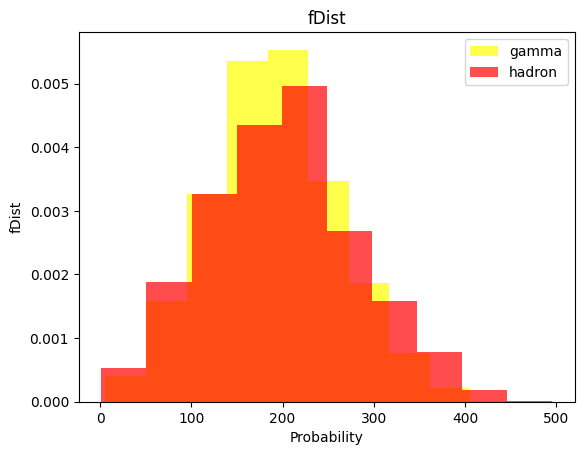

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df['class'] == 1][label],color='yellow',label='gamma',alpha=0.7,density=True)
  plt.hist(df[df['class'] == 0][label],color='red',label='hadron',alpha=0.7,density=True)
  plt.title(label)
  plt.xlabel('Probability')
  plt.ylabel(label)
  plt.legend()
  plt.show()

# Train , Validation , Test

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6 * len(df)),int(0.8 *len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
11667,40.9211,14.3070,2.8624,0.3294,0.1887,-4.9989,15.6654,7.5323,5.7170,204.3310,1
16520,63.8390,15.2121,2.7356,0.4601,0.2898,79.8441,59.8933,-6.3048,79.4397,127.1812,0
7647,56.0181,14.4800,2.9540,0.2268,0.1195,72.1434,29.0766,-9.2597,11.5618,144.2900,1
10323,68.5377,21.7562,2.9731,0.2149,0.1229,60.3419,64.8438,-11.3324,15.4940,186.1800,1
11828,51.7149,20.8026,3.1692,0.2303,0.1270,20.1727,48.7948,13.1598,3.7260,276.9510,1
...,...,...,...,...,...,...,...,...,...,...,...
5357,36.4659,16.4298,2.5058,0.3869,0.2075,46.7078,23.7806,-15.2667,12.9854,151.5210,1
4107,61.8286,16.2637,2.7969,0.3400,0.2083,16.5025,55.5797,-12.1978,19.1036,252.6350,1
11250,41.0274,19.2417,3.1433,0.2301,0.1355,-9.0591,-22.5224,9.4710,11.5205,201.9670,1
13036,72.5174,17.8667,2.9948,0.1984,0.1037,79.7300,32.7802,-8.4234,37.8377,166.1010,0


range of data, scale,

In [ ]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values    #till last column
  y = dataframe[dataframe.columns[-1]].values     #last column

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [ ]:
scaled_train, X_train, y_train = scale_dataset(train, oversample=True)
scaled_valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
scaled_test, X_test, y_test = scale_dataset(test, oversample=False)

# KNN

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=1)   #no of neighbors to consider  n=1 means only one neighbor is considered
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72      1310
           1       0.84      0.89      0.86      2494

    accuracy                           0.82      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.82      0.81      3804



🔹 For Class 0:
Precision = 0.77
→ Out of all predictions that were labeled as 0, 77% were actually 0.

Recall = 0.68
→ Out of all actual 0 values, the model correctly identified 68%.

F1-score = 0.72
→ The harmonic mean of precision and recall — balances both.

Support = 1276
→ There were 1276 actual instances of class 0.

🔹 For Class 1:
Precision = 0.85
→ Out of all predictions labeled as 1, 85% were correct.

Recall = 0.90
→ Out of all actual 1s, 90% were correctly predicted.

F1-score = 0.87
→ Very good balance between precision and recall.

Support = 2528
→ There were 2528 actual instances of class 1.

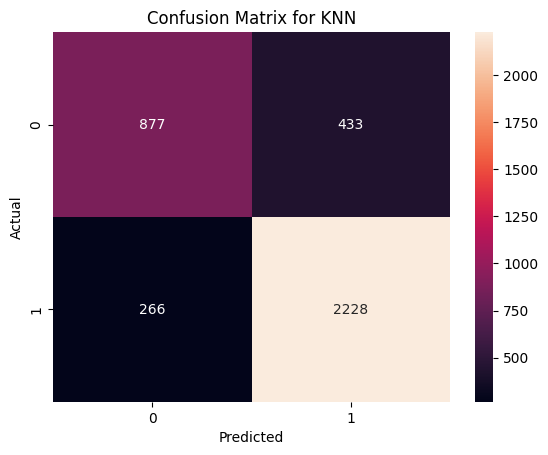

In [ ]:
knn_cm = confusion_matrix(y_test, y_pred)
sb.heatmap(knn_cm, annot=True, fmt="d")
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Naive Byes

In [ ]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)


GaussianNB()

In [ ]:
y_pred = model_nb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.40      0.50      1310
           1       0.74      0.91      0.82      2494

    accuracy                           0.73      3804
   macro avg       0.72      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



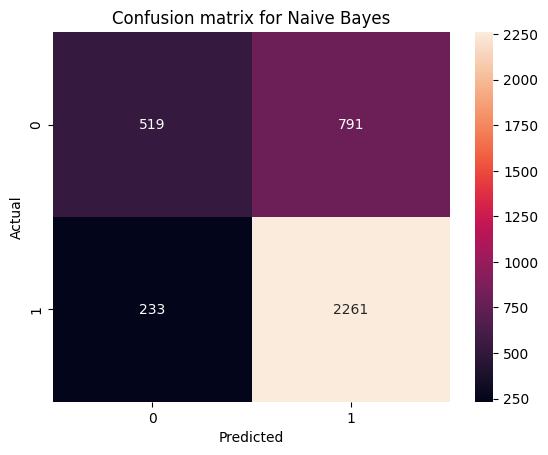

In [ ]:
nb_cm = confusion_matrix(y_test, y_pred)
sb.heatmap(nb_cm, annot=True, fmt="d")
plt.title('Confusion matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



# Logistic Regression

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model_lr.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70      1310
           1       0.85      0.82      0.83      2494

    accuracy                           0.79      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# SVM

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1310
           1       0.89      0.90      0.89      2494

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804

